Количество точек, количество кластеров? (Через запятую)
100, 2


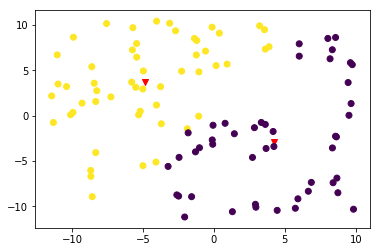

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from statistics import mean as meanlist

def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def KMeans4(matr, k = 2, seed = 4, eps = 0.0001):
    np.random.seed(seed)
    x = np.asarray(matr[:, 0])
    y = np.asarray(matr[:, 1])
    
    length = len(x)
    matr = np.concatenate([x, y, np.random.randint(0, k, length, dtype = int)])
    matr = matr.reshape(3, length).T
    
    xc = np.random.randint(0, length, k)
    yc = np.random.randint(0, length, k)
    xc = x[xc]
    yc = y[yc]
    asd = 35
    while True:
        asd -= 1
        if asd == 0:
            break
        for i in range(length):
            clast = k - 1
            dist_to_clast = dist(matr[i][0], matr[i][1], xc[k - 1], yc[k - 1])
            for j in range(k - 1):
                cur_dist = dist(matr[i][0], matr[i][1], xc[j], yc[j])
                if cur_dist < dist_to_clast:
                    dist_to_clast = cur_dist
                    clast = j
            matr[i][2] = clast
        sums = 0
        for i in range(k):
            fil = list(filter(lambda q: matr[q][2] == i, range(length)))
            if len(fil) == 0:
                print(matr)
            xcc = xc[i]
            ycc = yc[i]
            xc[i] = np.mean(x[fil])
            yc[i] = np.mean(y[fil])
            sums += dist(xc[i], yc[i], xcc, ycc)
        #print("#")
        #print(xc)
        #print(yc)
        if sums < eps:
            break
    
    '''
    for i in range(length):
        clast = k - 1
        dist_to_clast = dist(x[i], y[i], xc[k - 1], yc[k - 1])
        for j in range(k - 1):
            cur_dist = dist(x[i], y[i], xc[j], yc[j])
            if cur_dist < dist_to_clast:
                dist_to_clast = cur_dist
                clast = j
        matr[i][2] = clast
    for i in range(k):
        fil = list(filter(lambda q: matr[q][2] == i, range(length)))
        xc[i] = np.mean(x[fil])
        yc[i] = np.mean(y[fil])
            
    '''
    plt.scatter(xc, yc, marker = "v", c = 'r')
    return matr[:, 2]

sam, feat = eval(input("Количество точек, количество кластеров? (Через запятую)\n"))
x, y = make_blobs(n_samples = sam, n_features = 2, centers = 50, random_state = 12)
a = KMeans4(x, k = feat, eps = 1)
plt.scatter(x[:, 0], x[:, 1], c = a)
plt.show()
    